## Measuring mapping for Multiplane Analysis

In this example we'll measure the channel to channel mapping necessary for multiplane analysis.

The mapping is a first order linear transform:

\begin{equation*}
\begin{bmatrix}
x_{f}\\
y_{f}
\end{bmatrix}
=
\begin{bmatrix}
A & B & C\\
D & E & F
\end{bmatrix}
\times
\begin{bmatrix}
1\\
x_{i}\\
y_{i}\\
\end{bmatrix}
\end{equation*}

It describes how to go between the coordinate systems of the different cameras. This relatively simple mapping is good enough for multiplane analysis, which does not require extremely high accuracy. For this analysis mapping errors on the scale of ~0.2 pixels are sufficient.

Further details about how the mapping is determined can be found in the `micrometry_mapping` notebook.


### Configuration

In real experiments you'd use a slide with sparse fiducials such as beads. The slide is quickly scanned through the focus planes of the different cameras to minimize the effects of any drift in X/Y. A single in focus image for each channel is then analyzed with `3D-DAOSTORM` or `sCMOS`.


In [3]:
import os
os.chdir(r"F:\moritz\babcock_test")
print(os.getcwd())

import numpy
numpy.random.seed(1) # Set seed so that the example is repeatable.

F:\moritz\babcock_test


Generate the sample data for this example. 

In this case we're just going to simulate sparse fiducials. 

In [4]:
import storm_analysis.jupyter_examples.multiplane_mapping as multiplane_mapping

# Make a fake sCMOS calibration file.
multiplane_mapping.makeCMOSCalibration()

# Make an sCMOS analysis XML file.
multiplane_mapping.sCMOSXML()


In [5]:
# This is the format of the mapping file that is used for multiplane imaging.
#
# In this particular mapping each channel is translated relative to the reference channel, channel 0.
# Also there are 3 different channels.
#
mappings = {"0_0_x" : numpy.array([0.0, 1.0, 0.0]),
            "0_0_y" : numpy.array([0.0, 0.0, 1.0]),
            "0_1_x" : numpy.array([2.0, 1.0, 0.0]),
            "0_1_y" : numpy.array([5.0, 0.0, 1.0]),
            "1_0_x" : numpy.array([-2.0, 1.0, 0.0]),
            "1_0_y" : numpy.array([-5.0, 0.0, 1.0]),
            "0_2_x" : numpy.array([3.0, 1.0, 0.0]),
            "0_2_y" : numpy.array([4.0, 0.0, 1.0]),
            "2_0_x" : numpy.array([-3.0, 1.0, 0.0]),
            "2_0_y" : numpy.array([-4.0, 0.0, 1.0])}
n_planes = 3            

multiplane_mapping.makeSampleData(mappings)


Creating random localizations.
Added 28
3
Added 28
Added 28
Added 28
Frame 0 28 emitters
Frame 1 28 emitters
Frame 0 28 emitters
Frame 1 28 emitters
Frame 0 28 emitters
Frame 1 28 emitters


### Analyze fiducial movies with sCMOS analysis

In [6]:
import storm_analysis.sCMOS.scmos_analysis as scmosAnalysis

for i in range(n_planes):
    
    # Remove stale results, if any.
    h5_name = "c" + str(i+1) + "_map.hdf5"
    if os.path.exists(h5_name):
        os.remove(h5_name)
        
    scmosAnalysis.analyze("c" + str(i+1) + "_map.dax", h5_name, "scmos.xml")



version 2023.02.26

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 28 28

Added 28
   1 peak finding iterations.

   0 fits reset due to Cholesky failure.
   0 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   0 fits reset due to negative height.
   0 fits reset due to non-decreasing error (LM).
   0 fits did not converge.
   0 fits were lost.
   0 peaks lost to proximity filter.
   0 peaks lost to low significance.
   255 fitting iterations.

Tracking.

Checking z values.

Analysis complete

version 2023.02.26

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 27 27

Added 27
   1 peak finding iterations.

   0 fits reset due to Cholesky failure.
   0 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   0 fits reset due to negative height.
   0 fits reset due to non-decreasing error (LM).
   0 fits did not converge.
   0 fits were lost.
   0 peaks lost to proximity filter.
   0 peaks lost to l

### Check analysis

c1_map.hdf5


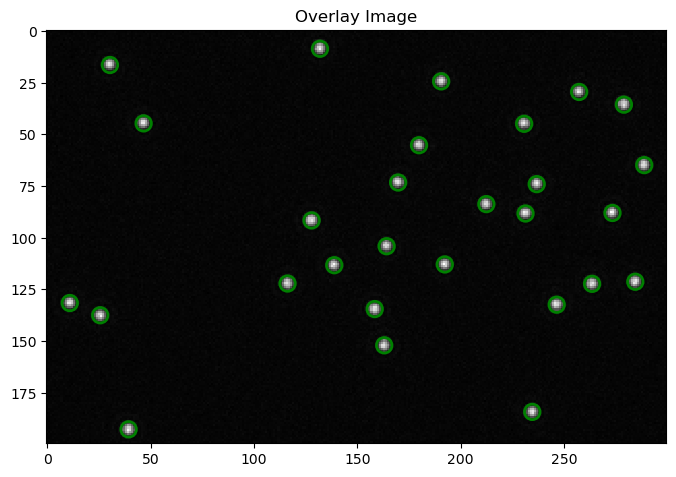

c2_map.hdf5


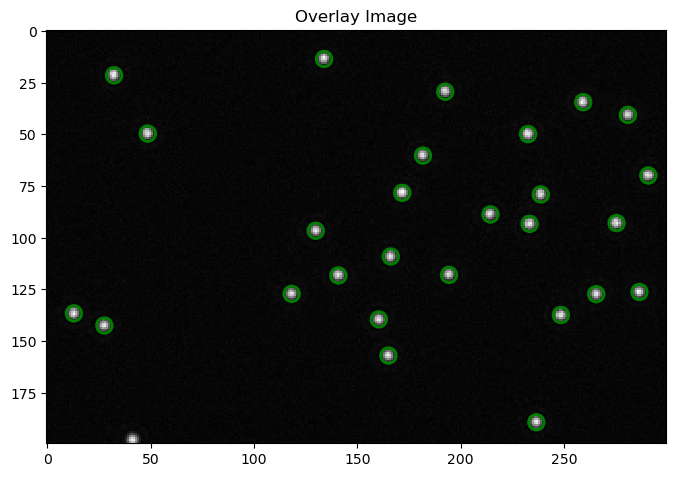

c3_map.hdf5


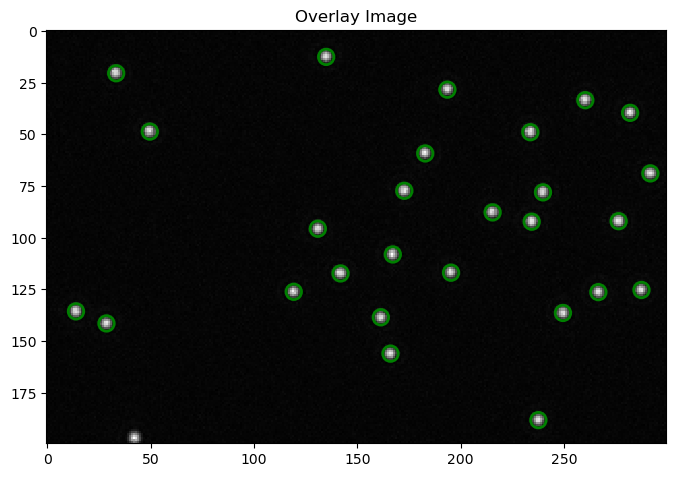

In [7]:
import storm_analysis.jupyter_examples.overlay_image as overlay_image

for i in range(n_planes):
    
    h5_name = "c" + str(i+1) + "_map.hdf5"
    print(h5_name)
    overlay_image.overlayImage("c" + str(i+1) + "_map.dax", h5_name, 0)

### Determine mappings.

Here we determine the mapping between each channel and channel 0.

Making quads for the 'reference' data.
Created 379 quads

Making quads for the 'other' data.
Created 379 quads

Comparing quads.
Match 0 1.00 1.67e-05 11.00
Match 1 0.99 1.67e-05 10.99
Match 2 0.99 1.67e-05 10.99
Match 3 0.94 1.67e-05 10.94
Match 4 0.99 1.67e-05 10.99
Match 5 1.00 1.67e-05 11.00
Match 6 1.00 1.67e-05 11.00
Match 7 0.92 1.67e-05 10.92
Match 8 0.98 1.67e-05 10.99
Match 9 0.98 1.67e-05 10.98
Match 10 0.99 1.67e-05 10.99
Match 11 0.97 1.67e-05 10.97
Match 12 0.93 1.67e-05 10.93
Match 13 0.98 1.67e-05 10.98
Match 14 1.00 1.67e-05 11.00
Match 15 1.00 1.67e-05 11.00
Match 16 0.98 1.67e-05 10.98
Match 17 0.99 1.67e-05 11.00
Match 18 1.00 1.67e-05 11.00
Match 19 0.98 1.67e-05 10.98
Match 20 0.99 1.67e-05 10.99
Match 21 1.00 1.67e-05 11.00
Match 22 1.00 1.67e-05 11.00
Match 23 0.99 1.67e-05 10.99
Match 24 0.99 1.67e-05 10.99
Match 25 0.99 1.67e-05 10.99
Match 26 0.99 1.67e-05 10.99
Match 27 1.00 1.67e-05 11.00
Match 28 0.98 1.67e-05 10.99
Match 29 0.99 1.67e-05 10.99
Match 30 1.

d:\.anaconda\envs\mp_smlm\Lib\site-packages\storm_analysis-2.2-py3.12.egg\storm_analysis\micrometry\quads.py:181: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return [numpy.linalg.lstsq(m, x)[0],
d:\.anaconda\envs\mp_smlm\Lib\site-packages\storm_analysis-2.2-py3.12.egg\storm_analysis\micrometry\quads.py:182: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  numpy.linalg.lstsq(m, y)[0]]


Match 367 1.00 1.67e-05 11.00
Match 368 0.98 1.67e-05 10.99
Match 369 1.00 1.67e-05 11.00
Match 370 1.00 1.67e-05 11.00
Match 371 0.99 1.67e-05 11.00
Match 372 0.96 1.67e-05 10.96
Match 373 0.99 1.67e-05 10.99
Match 374 0.97 1.67e-05 10.97
Match 375 1.00 1.67e-05 11.00
Match 376 1.00 1.67e-05 11.00
Match 377 0.99 1.67e-05 10.99
Found 378 matching quads


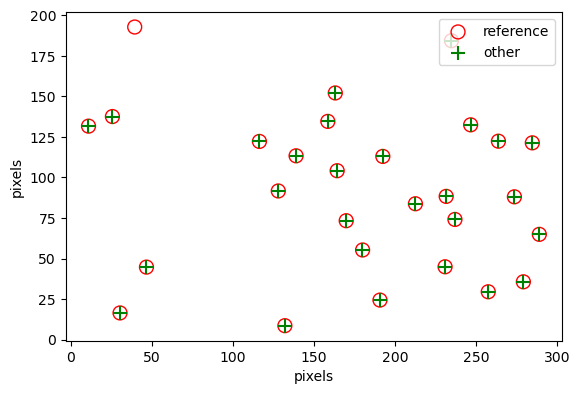

Making quads for the 'reference' data.
Created 379 quads

Making quads for the 'other' data.
Created 379 quads

Comparing quads.
Match 0 0.99 1.67e-05 10.99
Match 1 1.00 1.67e-05 11.00
Match 2 1.00 1.67e-05 11.00
Match 3 0.90 1.67e-05 10.90
Match 4 0.99 1.67e-05 10.99
Match 5 1.00 1.67e-05 11.00
Match 6 1.00 1.67e-05 11.00
Match 7 0.95 1.67e-05 10.95
Match 8 1.00 1.67e-05 11.00
Match 9 0.97 1.67e-05 10.97
Match 10 0.99 1.67e-05 10.99
Match 11 0.99 1.67e-05 10.99
Match 12 0.96 1.67e-05 10.97
Match 13 1.00 1.67e-05 11.00
Match 14 1.00 1.67e-05 11.00
Match 15 0.99 1.67e-05 10.99
Match 16 0.98 1.67e-05 10.99
Match 17 0.99 1.67e-05 10.99
Match 18 0.99 1.67e-05 10.99
Match 19 1.00 1.67e-05 11.00
Match 20 0.96 1.67e-05 10.96
Match 21 1.00 1.67e-05 11.00
Match 22 0.99 1.67e-05 10.99
Match 23 0.99 1.67e-05 10.99
Match 24 1.00 1.67e-05 11.00
Match 25 0.99 1.67e-05 10.99
Match 26 1.00 1.67e-05 11.00
Match 27 1.00 1.67e-05 11.00
Match 28 1.00 1.67e-05 11.00
Match 29 1.00 1.67e-05 11.00
Match 30 1.

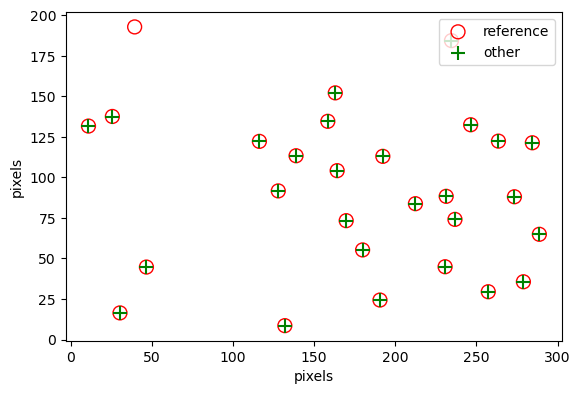

In [8]:
import storm_analysis.micrometry.micrometry as micrometry

for i in range(1, n_planes):    
    locs1 = "c1_map.hdf5"
    locs2 = "c" + str(i+1) + "_map.hdf5"
    results = "c1_c" + str(i+1) + "_map.map"
    micrometry.runMicrometry(locs1, 
                             locs2, 
                             results, 
                             min_size = 5.0, 
                             max_size = 100.0, 
                             max_neighbors = 20, 
                             tolerance = 1.0e-2, 
                             no_plots = False)

### Check individual mappings

In [9]:
import pickle

# Print the mappings.
for i in range(1, n_planes):
    
    results = "c1_c" + str(i+1) + "_map.map"
    with open(results, "rb") as fp:
        a_map = pickle.load(fp)

    print(results)
    for elt in sorted(a_map):
        print(elt, a_map[elt])
    print()


c1_c2_map.map
0_1_x [2.01528793e+00 9.99816818e-01 2.46714917e-04]
0_1_y [5.00959920e+00 2.22061623e-05 9.99993683e-01]
1_0_x [-2.01398229e+00  1.00018189e+00 -2.48536679e-04]
1_0_y [-5.00893109e+00 -2.41970208e-05  1.00000367e+00]

c1_c3_map.map
0_1_x [3.01466279e+00 9.99890156e-01 7.57158949e-05]
0_1_y [ 4.05083981e+00 -2.38250231e-04  9.99930352e-01]
1_0_x [-3.01441863e+00  1.00010786e+00 -7.55970054e-05]
1_0_y [-4.05163458e+00  2.36777515e-04  1.00006974e+00]



### Merge mappings

Note: This step is only necessary if you have more than two channels.

In [ ]:
import storm_analysis.micrometry.merge_maps as mergeMaps

# Create list of map files to merge.
to_merge = []
for i in range(1, n_planes):    
    to_merge.append("c1_c" + str(i+1) + "_map.map")
    
m_map = None
if (len(to_merge) > 1):
    # Merge.
    m_map = mergeMaps.mergeMaps(to_merge)

    for elt in sorted(m_map):
        print(elt, m_map[elt])
    print()

    # Save results for multiplane.
    with open("map.map", 'wb') as fp:
        pickle.dump(m_map, fp)
        
else:
    print("Merge not necessary")

We can also check the results against our original mapping.

In [ ]:
if m_map is not None:
    is_good = True
    for elt in sorted(m_map):
        if not numpy.allclose(m_map[elt], mappings[elt], atol = 1.0e-1, rtol = 1.0-1):
            print("map error detected for:")
            print(elt, m_map[elt], mappings[elt])
            print()
            is_good = False
    if is_good:
        print("No differences detected.")